In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = 'LengthOfStay.csv'
data = pd.read_csv(file_path)

In [2]:
# Handling categorical variables
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])

# One-hot encoding for 'facid'
data = pd.get_dummies(data, columns=['facid'], drop_first=True)

# Converting dates to ordinal
data['vdate'] = pd.to_datetime(data['vdate']).map(pd.Timestamp.toordinal)
data['discharged'] = pd.to_datetime(data['discharged']).map(pd.Timestamp.toordinal)

# Encoding 'rcount' if it's not numeric
if data['rcount'].dtype == 'object':
    data['rcount'] = label_encoder.fit_transform(data['rcount'])


In [3]:

# Separating features and target variable
X = data.drop(['lengthofstay'], axis=1)
y = data['lengthofstay']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Linear regressor

In [4]:
# Ridge Regression Model
ridge_model = Ridge()

ridge_model.fit(X_train_scaled, y_train)

y_pred_ridge = ridge_model.predict(X_test_scaled)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

ridge_regression_performance = {'MSE': mse_ridge, 'RMSE': rmse_ridge, 'R^2': r2_ridge}
print(ridge_regression_performance)

{'MSE': 0.03875421873137618, 'RMSE': 0.1968609121470694, 'R^2': 0.992937337033899}


In [5]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

ridge = Ridge()

grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_

best_ridge_model = Ridge(**best_params)
best_ridge_model.fit(X_train_scaled, y_train)

y_pred_best_ridge = best_ridge_model.predict(X_test_scaled)
mse_best_ridge = mean_squared_error(y_test, y_pred_best_ridge)
rmse_best_ridge = np.sqrt(mse_best_ridge)
r2_best_ridge = r2_score(y_test, y_pred_best_ridge)

best_ridge_performance = {'MSE': mse_best_ridge, 'RMSE': rmse_best_ridge, 'R^2': r2_best_ridge, 'Best Alpha': best_params['alpha']}
print(best_ridge_performance)


{'MSE': 5.649443343805585e-06, 'RMSE': 0.002376855768406149, 'R^2': 0.999998970431721, 'Best Alpha': 0.01}


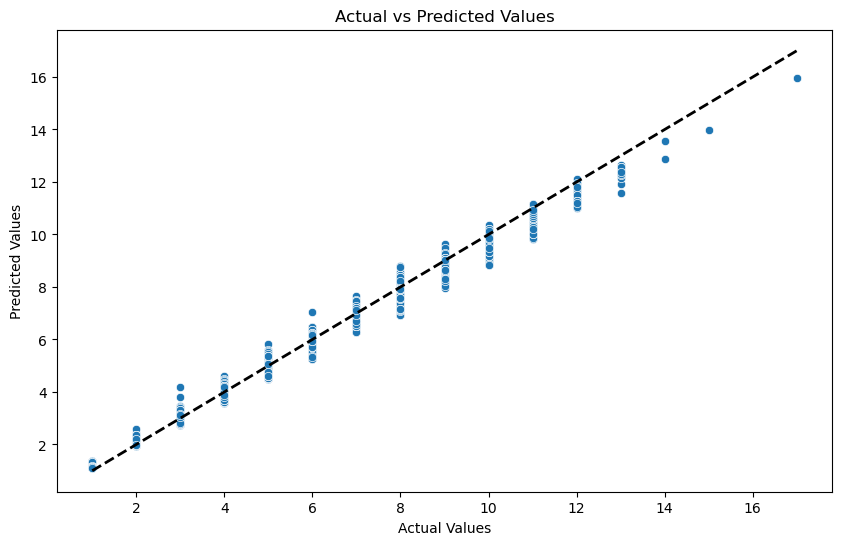

In [74]:
import matplotlib.pyplot as plt

ridge_model_optimal = Ridge(alpha=0.01)
ridge_model_optimal.fit(X_train_scaled, y_train)

y_pred_ridge_optimal = ridge_model_optimal.predict(X_test_scaled)

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_ridge)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()



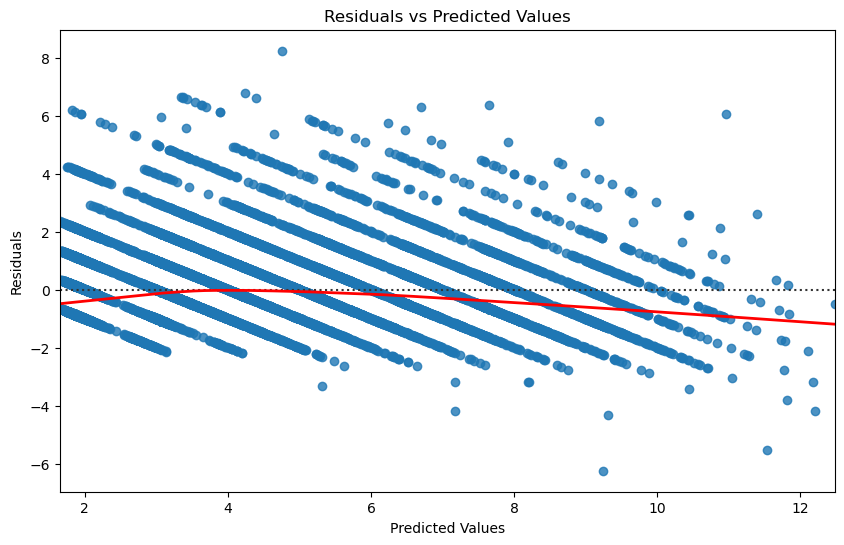

In [88]:

# Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred_lasso, y=y_test, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()



**RANDOM FOREST REGRESSOR

In [6]:
from sklearn.ensemble import RandomForestRegressor

random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)


random_forest_model.fit(X_train_scaled, y_train)

y_pred_random_forest = random_forest_model.predict(X_test_scaled)

mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
rmse_random_forest = np.sqrt(mse_random_forest)
r2_random_forest = r2_score(y_test, y_pred_random_forest)

random_forest_performance = {'MSE': mse_random_forest, 'RMSE': rmse_random_forest, 'R^2': r2_random_forest}
random_forest_performance



{'MSE': 0.42028763500000005,
 'RMSE': 0.6482959470797269,
 'R^2': 0.9234057604050873}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Reduced parameter grid
param_distributions = {
    'n_estimators': [50, 100],  # Fewer estimators
    'max_depth': [None, 10]     # Limited depth options

}

# Initialize RandomizedSearchCV with fewer iterations and minimal cross-validation
rnd_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                                param_distributions=param_distributions,
                                n_iter=4,  # Very few iterations
                                cv=2,      # Minimal cross-validation
                                n_jobs=-1,
                                verbose=2,
                                random_state=42)


In [ ]:

rnd_search.fit(X_train_scaled, y_train)

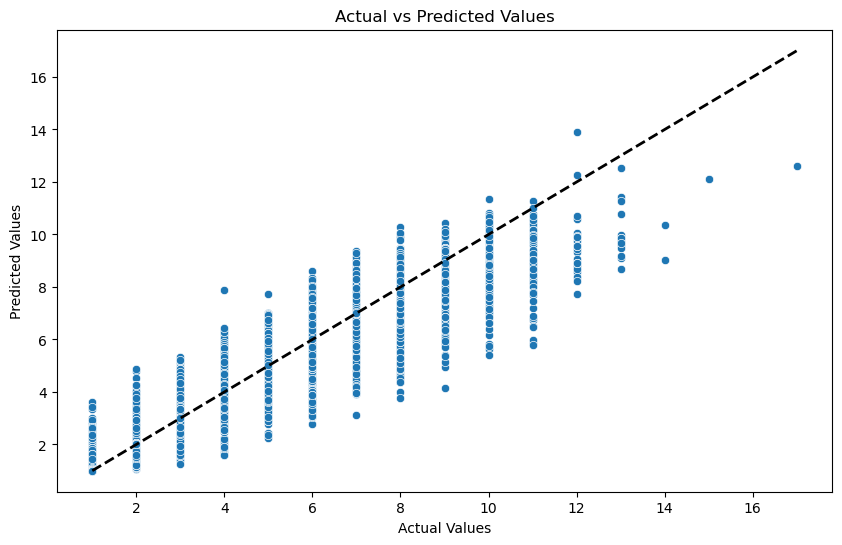

In [90]:
import seaborn as sns

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_random_forest)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Line for perfect predictions
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


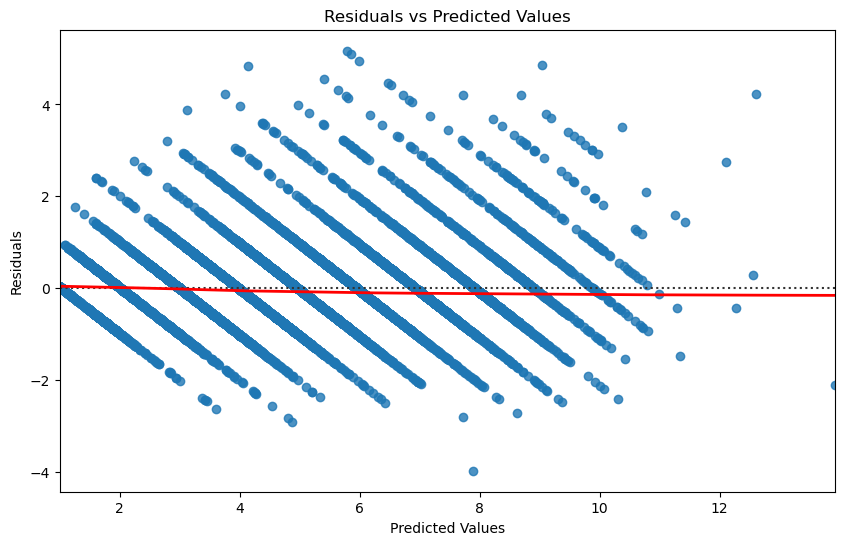

In [92]:

# Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred_random_forest, y=y_test, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()



In the resulting plot, you're looking for a random distribution of residuals. If the residuals show patterns (like a curve or clustering), it suggests that the model is not capturing some aspect of the data, which could be a sign of underfitting. If you see outliers in the residuals, this might indicate overfitting to certain data points.

In [10]:
from sklearn.model_selection import cross_val_score

# Random Forest Regressor model
random_forest_cv_model = RandomForestRegressor(n_estimators=50, random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(random_forest_cv_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of the cross-validation scores
cv_scores_mean = np.mean(cv_scores)
cv_scores_std = np.std(cv_scores)

print(f"Mean CV Score (MSE): {-cv_scores_mean:.4f}, Standard Deviation: {cv_scores_std:.4f}")


Mean CV Score (MSE): 0.1373, Standard Deviation: 0.0058


Overall, these cross-validation results can provide a more reliable assessment of your model's performance compared to a single train-test split, especially in terms of understanding how the model generalizes to unseen data. If the cross-validation MSE is similar to your test MSE, it's a good sign that your model is not overfitting and is generalizing well. If there's a large discrepancy, it might indicate overfitting to the training data.

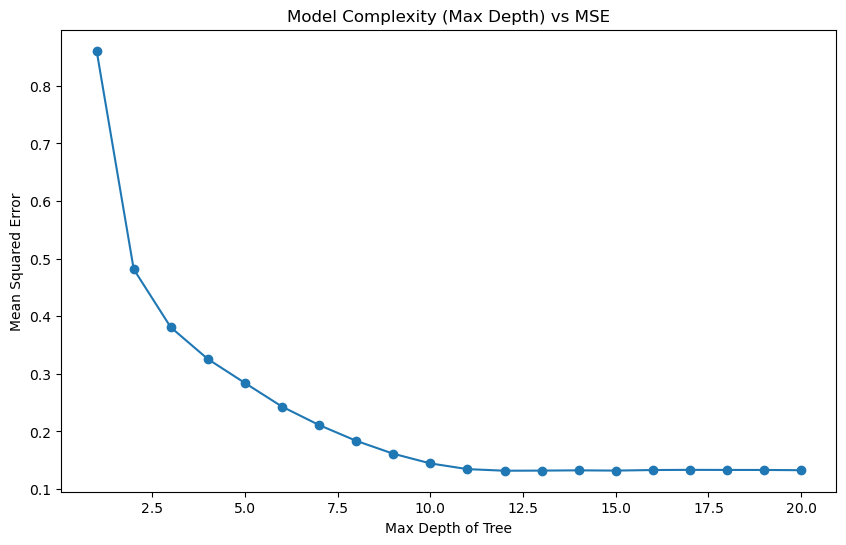

In [40]:
##Model Complexity Analysis

from sklearn.metrics import mean_squared_error

max_depths = range(1, 21)  # Example range
mse_scores = []

for depth in max_depths:
    model = RandomForestRegressor(max_depth=depth, random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred_temp = model.predict(X_test_scaled)
    mse_scores.append(mean_squared_error(y_test, y_pred_temp))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(max_depths, mse_scores, marker='o')
plt.xlabel('Max Depth of Tree')
plt.ylabel('Mean Squared Error')
plt.title('Model Complexity (Max Depth) vs MSE')
plt.show()


**DecisionTreeRegressor

In [78]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regressor model
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Training the Decision Tree model
decision_tree_model.fit(X_train_scaled, y_train)

# Making predictions
y_pred_dt = decision_tree_model.predict(X_test_scaled)

# Evaluating the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

decision_tree_performance = {'MSE': mse_dt, 'RMSE': rmse_dt, 'R^2': r2_dt}
decision_tree_performance



{'MSE': 0.87835, 'RMSE': 0.9372032863792145, 'R^2': 0.839927362249923}

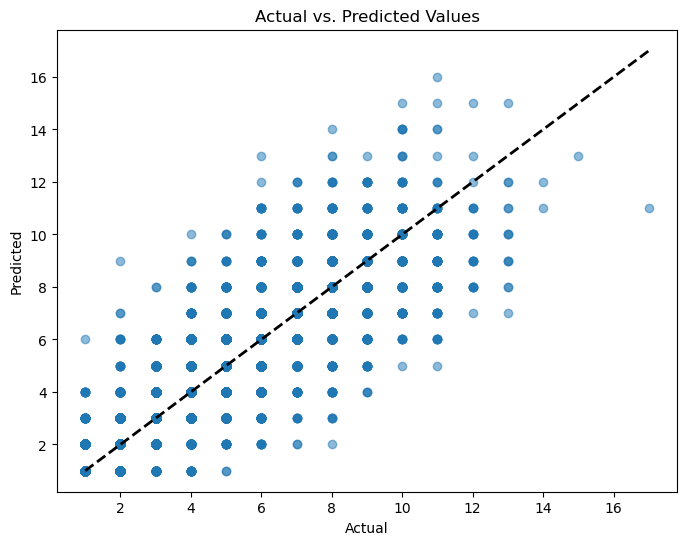

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.5)  # replace y_pred_dt with your model's predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line for perfect predictions
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()


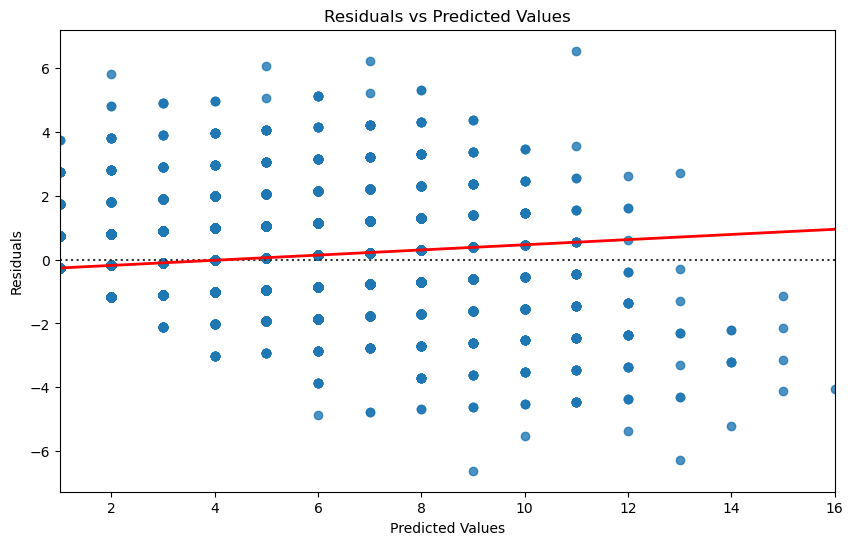

In [81]:
# Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred_dt, y=y_test, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


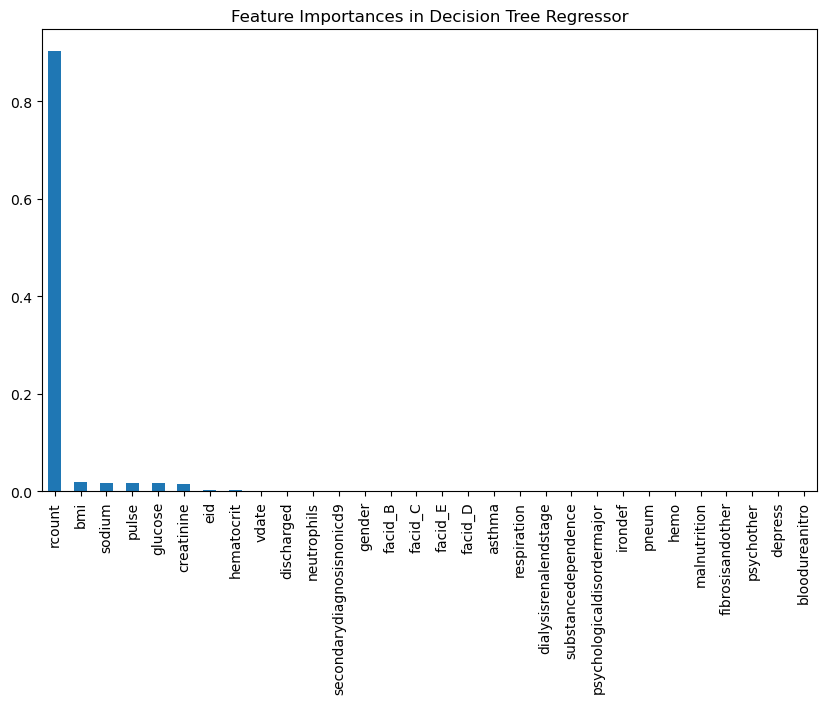

In [13]:
##Feature Importance Analysis

import pandas as pd
import matplotlib.pyplot as plt

# Feature importance
feature_importances = decision_tree_model.feature_importances_

# Convert the feature importances to a pandas Series for easy plotting
importances_series = pd.Series(feature_importances, index=X.columns)

# Sort the features by importance
importances_sorted = importances_series.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
importances_sorted.plot(kind='bar')
plt.title('Feature Importances in Decision Tree Regressor')
plt.show()


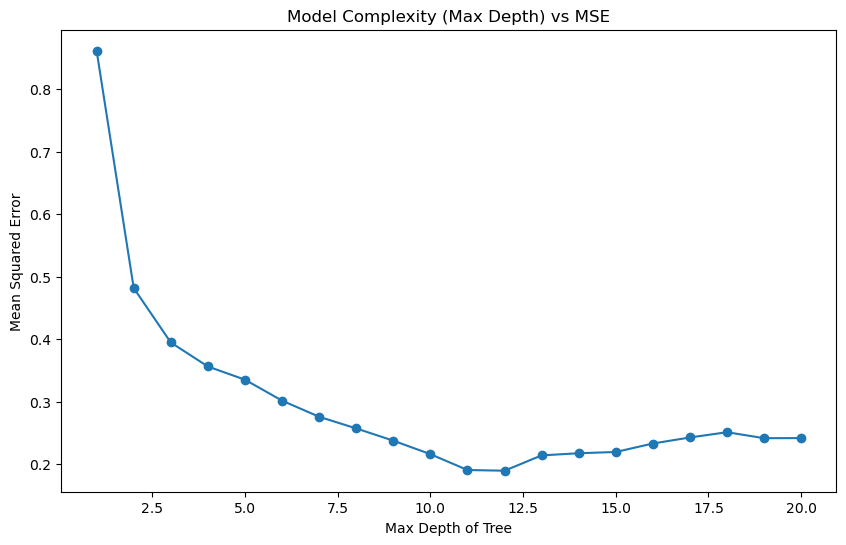

In [26]:
##Model Complexity Analysis

from sklearn.metrics import mean_squared_error

max_depths = range(1, 21)  # Example range
mse_scores = []

for depth in max_depths:
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred_temp = model.predict(X_test_scaled)
    mse_scores.append(mean_squared_error(y_test, y_pred_temp))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(max_depths, mse_scores, marker='o')
plt.xlabel('Max Depth of Tree')
plt.ylabel('Mean Squared Error')
plt.title('Model Complexity (Max Depth) vs MSE')
plt.show()


When the tree is very shallow (low max depth), it's not very accurate—it makes quite a few mistakes.
As the tree is allowed to grow (increasing max depth), it gets more accurate, and the mistakes decrease significantly.
After reaching a certain depth, making the tree deeper doesn't really improve accuracy anymore.
If the tree gets too deep, it might start to learn random patterns that don't really exist (we call this overfitting), but it doesn't seem like we've reached that point in your plot.
So, in short, your plot is telling you that there's a "sweet spot" for the tree depth that gives you the best accuracy without the tree becoming too complex.

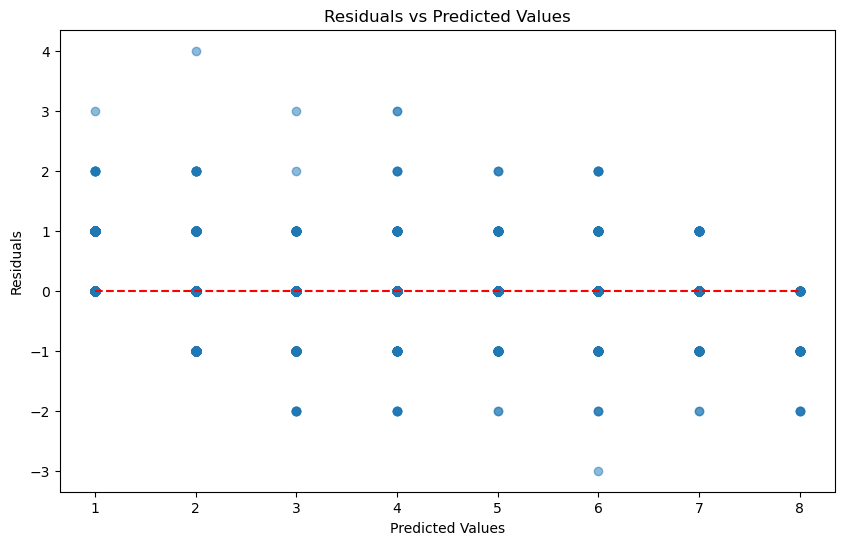

In [28]:
# Calculate residuals
residuals = y_test - y_pred_dt  # Replace y_pred_dt with your Decision Tree predictions

# Plotting residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_dt, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_pred_dt.min(), xmax=y_pred_dt.max(), colors='red', linestyles='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


the residuals show a pattern (like a curve or clustering in one part of the graph), that would suggest that the model is not capturing some aspect of the data's trend. In your plot, there is no obvious pattern, which is generally a good indication that the model is fitting well.

**Gradient Boosting Regressor

In [83]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model on the training data
gb_regressor.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_gb = gb_regressor.predict(X_test_scaled)

# Calculate the performance metrics
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Print the performance metrics
print(f'MSE (Gradient Boosting): {mse_gb}')
print(f'RMSE (Gradient Boosting): {rmse_gb}')
print(f'R-squared (Gradient Boosting): {r2_gb}')


MSE (Gradient Boosting): 0.3594836702303116
RMSE (Gradient Boosting): 0.5995695708008467
R-squared (Gradient Boosting): 0.9344868226540163


In [31]:
#cross validation 

from sklearn.model_selection import cross_val_score

# Configure the cross-validation procedure
cv_folds = 5  # Number of folds

# Execute the cross-validation
cv_scores = cross_val_score(gb_regressor, X_train_scaled, y_train, cv=cv_folds, scoring='r2')

# Calculate the mean and standard deviation of the cross-validation scores
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

print(f"Cross-Validation R^2 scores: {cv_scores}")
print(f"Mean R^2: {cv_mean:.4f}, Standard Deviation: {cv_std:.4f}")


Cross-Validation R^2 scores: [0.97184006 0.97209194 0.97266799 0.97258731 0.97283661]
Mean R^2: 0.9724, Standard Deviation: 0.0004


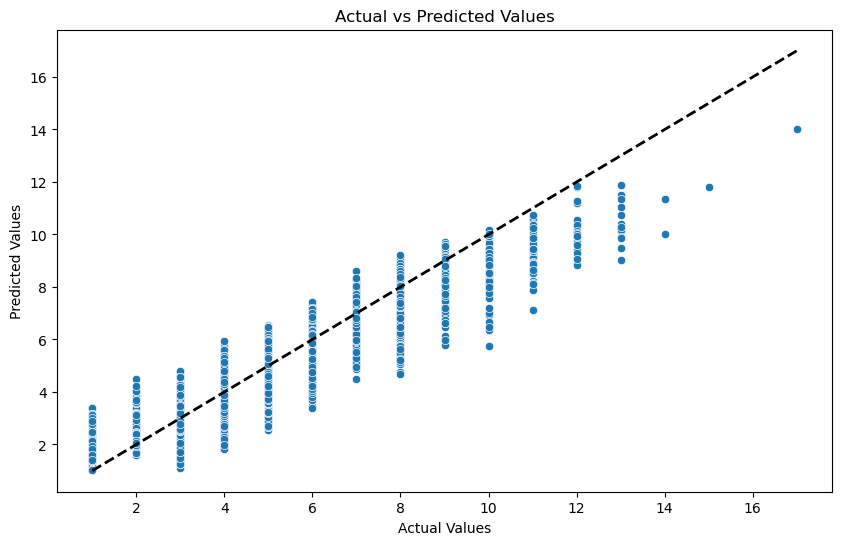

In [84]:
import seaborn as sns

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_gb)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Line for perfect predictions
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


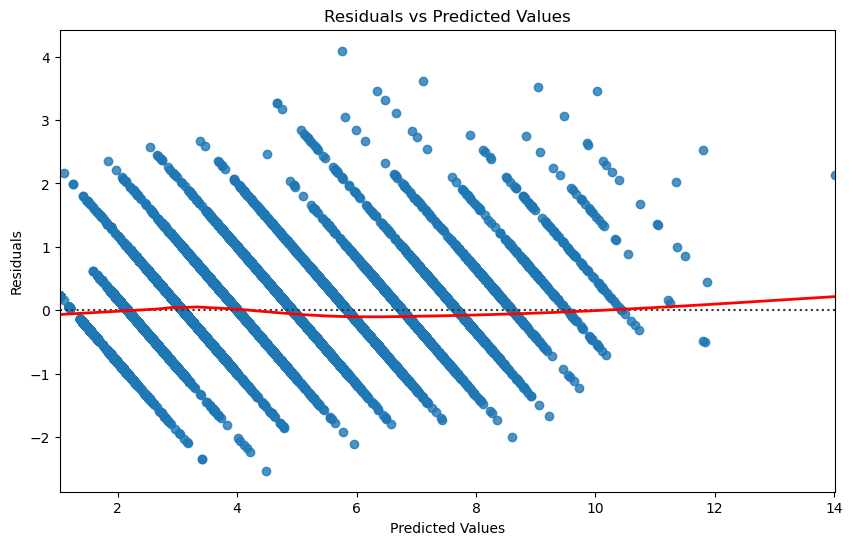

In [85]:
# Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred_gb, y=y_test, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


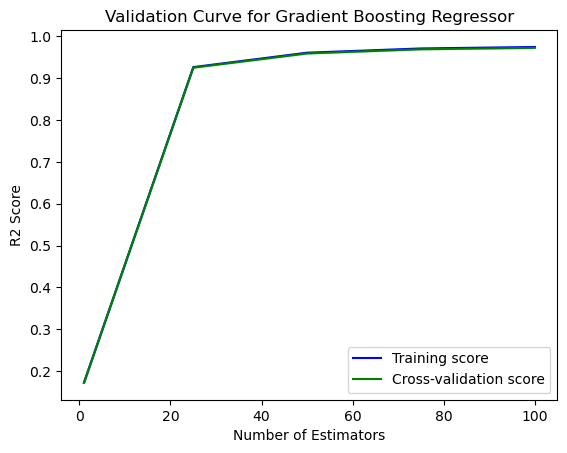

In [38]:
from sklearn.model_selection import validation_curve

# Choose a hyperparameter and range of values to explore
param_range = np.linspace(1, 100, 5).astype(int)  # Example for 'n_estimators'

# Calculate the scores for the training and test sets
train_scores, test_scores = validation_curve(
    GradientBoostingRegressor(),
    X_train_scaled, 
    y_train, 
    param_name="n_estimators", 
    param_range=param_range,
    scoring="r2", 
    cv=5
)

# Calculate means and standard deviations
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.plot(param_range, train_mean, label="Training score", color="b")
plt.plot(param_range, test_mean, label="Cross-validation score", color="g")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="b", alpha=0.2)
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="g", alpha=0.2)
plt.legend(loc="best")
plt.xlabel('Number of Estimators')
plt.ylabel('R2 Score')
plt.title('Validation Curve for Gradient Boosting Regressor')
plt.show()


**There is no obvious sign of overfitting here since the cross-validation score does not decrease as the number of estimators increases. Overfitting would typically be indicated by the training score continuing to increase while the cross-validation score starts to decrease. However, the plot seems to show a consistent improvement in the cross-validation score.

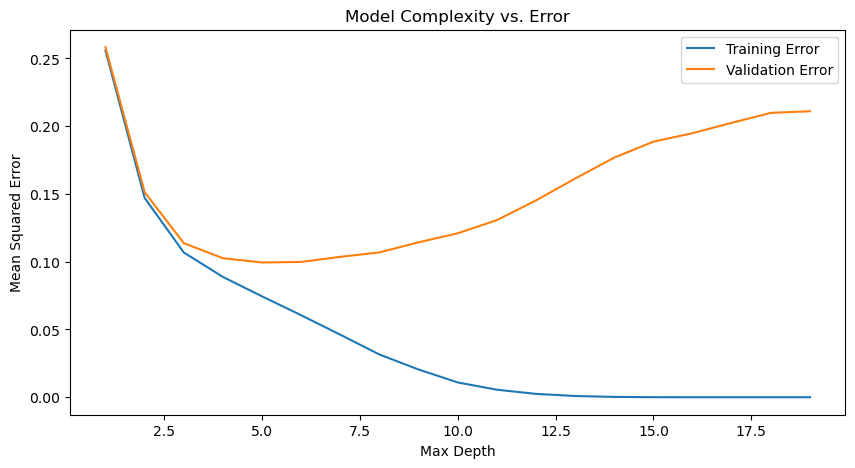

In [39]:
from sklearn.metrics import mean_squared_error

# Lists to keep track of scores
training_errors = []
validation_errors = []

# Values to test for max_depth
depths = range(1, 20)

# Loop over the values of max_depth
for depth in depths:
    model = GradientBoostingRegressor(max_depth=depth, n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)
    
    # Record the training set error
    training_predictions = model.predict(X_train_scaled)
    training_mse = mean_squared_error(y_train, training_predictions)
    training_errors.append(training_mse)
    
    # Record the validation set error
    validation_predictions = model.predict(X_test_scaled)
    validation_mse = mean_squared_error(y_test, validation_predictions)
    validation_errors.append(validation_mse)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(depths, training_errors, label='Training Error')
plt.plot(depths, validation_errors, label='Validation Error')
plt.xlabel('Max Depth')
plt.ylabel('Mean Squared Error')
plt.title('Model Complexity vs. Error')
plt.legend()
plt.show()


**Lasso regressor

In [63]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Lasso Regressor with an alpha value
lasso_regressor = Lasso(alpha=0.01, random_state=42)  # Alpha is the regularization parameter

# Fit the model on the training data
lasso_regressor.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_lasso = lasso_regressor.predict(X_test_scaled)

# Calculate the performance metrics for the test set
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Print the performance metrics
print(f'Lasso Regressor Test Set - MSE: {mse_lasso}, RMSE: {rmse_lasso}, R^2: {r2_lasso}')


Lasso Regressor Test Set - MSE: 1.2861547007353382, RMSE: 1.1340876071694541, R^2: 0.765608042919831


In [87]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

# Define your model (assuming Lasso, but this can be any regression model)
model = Lasso(alpha=0.01)

# Perform cross-validation
cv_r2_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
cv_mae_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_mse_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate the average and standard deviation of the performance metric across all folds
r2_average = cv_r2_scores.mean()
r2_std = cv_r2_scores.std()
mae_average = -cv_mae_scores.mean()  # Scores are negative due to 'neg_mean_absolute_error' scoring
mae_std = cv_mae_scores.std()
mse_average = -cv_mse_scores.mean()  # Scores are negative due to 'neg_mean_squared_error' scoring
mse_std = cv_mse_scores.std()

# Print the results
print(f'R-squared: {r2_average:.2f} ')
print(f'Mean Absolute Error: {mae_average:.2f}')
print(f'Mean Squared Error: {mse_average:.2f}')


R-squared: 0.76 
Mean Absolute Error: 0.88
Mean Squared Error: 1.34


In [64]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import validation_curve

# Define a range of alpha values for Lasso
alphas = np.logspace(-4, 4, 20)

# Compute the validation curve
train_scores, valid_scores = validation_curve(Lasso(), X_train_scaled, y_train, 
                                              param_name="alpha", param_range=alphas, 
                                              cv=5, scoring='r2')

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for validation set scores
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)



C:\Users\ssuni\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.328e+04, tolerance: 3.580e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\ssuni\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.265e+04, tolerance: 3.580e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\ssuni\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.083e+04, toleranc

C:\Users\ssuni\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.087e+03, tolerance: 3.557e+01
  model = cd_fast.enet_coordinate_descent(


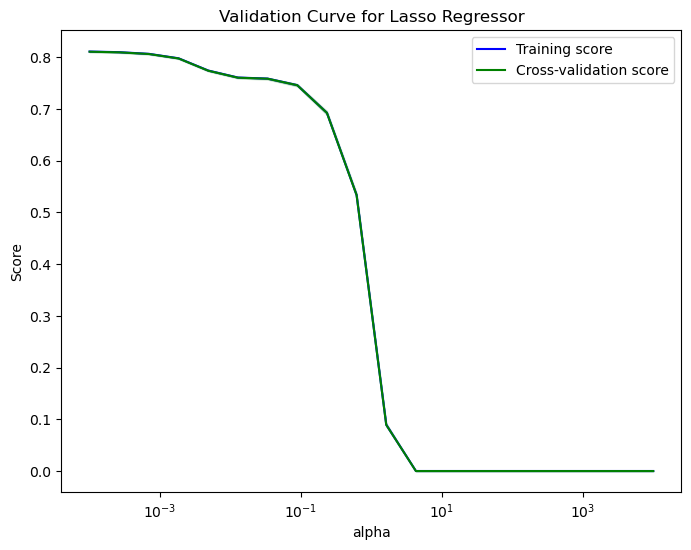

In [65]:
# Plot the validation curve
plt.subplots(1, 1, figsize=(8, 6))
plt.semilogx(alphas, train_mean, label="Training score", color="blue")
plt.fill_between(alphas, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.semilogx(alphas, valid_mean, label="Cross-validation score", color="green")
plt.fill_between(alphas, valid_mean - valid_std, valid_mean + valid_std, color="green", alpha=0.2)

plt.title('Validation Curve for Lasso Regressor')
plt.xlabel('alpha')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()


Resulting in a model that is too simple and performs poorly, hence underfitting both the training and validation data

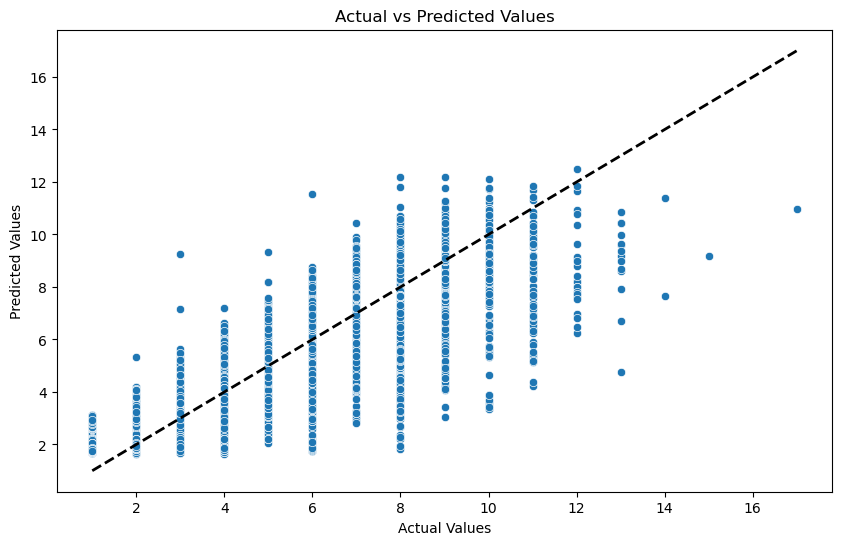

In [69]:
import seaborn as sns

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lasso)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Line for perfect predictions
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


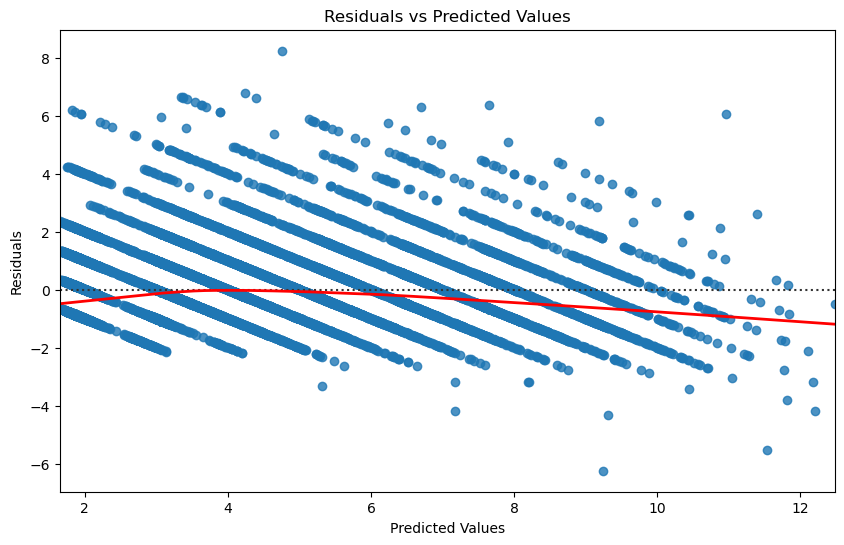

In [70]:
# Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred_lasso, y=y_test, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()
